<a href="https://colab.research.google.com/github/matari18/ml/blob/main/GD_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Градиентный спуск. Практика

## Импорт библиотек, установка константных значений

In [272]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_regression, fetch_california_housing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [273]:
RANDOM_STATE = 123
TRAIN_SIZE = 0.75

In [274]:
np.random.RandomState(RANDOM_STATE)

RandomState(MT19937) at 0x7B7632E31640

In [275]:
np.random.seed(RANDOM_STATE)

X, y, _ = make_regression(n_samples=100000,              # число объектов
                          n_features=10,                 # число признаков
                          n_informative=8,               # число информативных признаков
                          noise=100,                     # уровень шума в данных
                          coef=True,                     # значение True используется при генерации данных
                          random_state=RANDOM_STATE)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random()*0.01

## Практика

Реализуем метод градиентного спуска для обучения линейной регрессии.

### Задание 1 (1 балл)


Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле:

$$w = (X^TX)^{-1}X^Ty$$

Комментарий: для поиска решения в векторном виде сначала необходимо добавить единичный столбец к матрице $X$.
Это сделано в коде.

In [276]:
def ols_solution(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

### Задание 2 (1 балл)

Заполните функцию для предсказания модели по формуле
$$a(X)=Xw$$


In [277]:
def prediction(X, w):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ w

Продублируем функцию для вычисления значения MSE
$$MSE(w)=  \frac{1}{l}\,||Xw - y||^2 $$

In [278]:
def compute_cost(X, y, theta):
    m = len(y)
    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

### Задание 3

Скопируйте метод градиентного спуска из [урока](https://colab.research.google.com/drive/1Bos0LeQP9AAB-nrS0z8b-8ag5xRSEdty?usp=sharing) в этот ноутбук.


In [279]:
def gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X)) # добавляем к Х столбец из 1
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

### Бонус для отважных

Если чувствуете в себе силы, попробуйте написать SGD сами.

Модифицируйте метод градиентного спуска из урока так, чтобы это теперь был метод стохастического градиентного спуска:

* на каждой итерации выбирайте один случайный индекс `j` при помощи функции `random.randint`

* градиент на каждой итерации градиентного спуска считайте не как сумму градиентов по всем объектам, а только по одному объекту с индексом `j`

* на каждой итерации вычисляйте значение функции потерь и сохраняйте в список `cost_track`, который верните вместе с результатом работы функции

In [280]:
import random

def stochastic_gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    j = 0
    m = X.shape[0] # число объектов
    cost_track = np.zeros((iterations,1))

    for i in range(iterations):

        # выберите случайный индекс в диапазон от 0 до len(X)-1 включительно при помощи функции random.randint
        j = random.randint(0,  m)

        # обновите веса, используя сдвиг по градиенту только по объекту X[j] (делить на m в данном случае не нужно)
        params = params - 2.* learning_rate * (X[j].T @ ((params * X[j]) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

- Обучите линейную регрессию тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии ($X, y$). Для GD и самостоятельно написанного SGD используйте `learning_rate = 0.01, iterations = 10000`.

*P.S. Если же вы используете не самописный SGD, а SGDRegressor из библиотеки sklearn.linear_model, то его объявляйте с гиперпараметрами по умолчанию, то есть в скобках при объявлении модели ничего не указывайте.*

- С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (`from sklearn.metrics import r2_score`). Для получения предсказания использовуйте функцию `predict`.


In [281]:
params = np.random.rand(X.shape[1])
params

array([0.28613933, 0.22685145, 0.55131477, 0.71946897, 0.42310646,
       0.9807642 , 0.68482974, 0.4809319 , 0.39211752, 0.34317802,
       0.72904971])

In [282]:
# **План**

# 1 - находим веса одним из методов

# 2 - применяем функцию prediction для получения предсказаний с найденными весами (либо predict в случае использования SGDRegressor из библиотеки sklearn)

# 3 - вычисляем значение метрики r2

In [283]:
from sklearn.metrics import r2_score

In [284]:
# your code for OLS here
weights_ols = ols_solution(X, y)
%time  predict_ols = prediction(X, weights_ols)
print(round((r2_score(y, predict_ols)), 2))

CPU times: user 23.2 ms, sys: 10.1 ms, total: 33.3 ms
Wall time: 22 ms
0.75


In [285]:
# GD
cost_gd, weights_gd = gradient_descent(X, y, 0.01, 10000)
%time predict_gd = prediction(X, weights_gd)
print(predict_gd)

CPU times: user 12.7 ms, sys: 8.81 ms, total: 21.5 ms
Wall time: 11.1 ms
[ 299.33842839 -391.89714388   10.37616728 ...   38.5154564   297.88296583
 -240.31404213]


In [286]:
print(round((r2_score(y, predict_gd)), 2))

0.76


In [287]:
# SGD


## Quiz

Чему равно значение метрики $R^2$ для аналитического подхода?

Ответ округлите до сотых.

In [288]:
# your code for GD here
print(r2_score(y, predict))

0.7554626185750483


## Quiz

Нарисуйте траекторию уменьшения ошибки при обучении градиентного спуска (это параметр `cost_track`, возвращаемый функцией).

Чему приблизительно равен loss модели на последних итерациях?

Выберите наиболее близкий к полученному вами ответ.

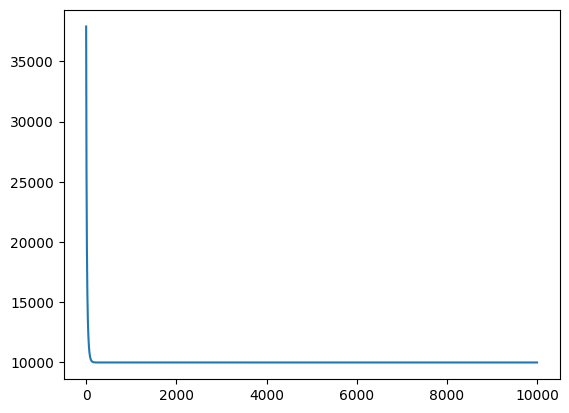

In [289]:
import matplotlib.pyplot as plt
plt.plot(cost_gd);

In [290]:
# your code for SGD here
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
sgd.fit(X, y)

%time pred_sgd = sgd.predict(X)

CPU times: user 9.7 ms, sys: 0 ns, total: 9.7 ms
Wall time: 8.65 ms


In [291]:
print(round((r2_score(y, pred_sgd)), 2))

0.76


## Quiz

Измерьте время работы аналитического подхода, а также GD и SGD (используйте magic command [`%%time`](https://ipython.readthedocs.io/en/stable/interactive/magics.html)).

Упорядочите результаты по возрастанию.

## Тестирование моделей на реальных данных

В реальных задачах никто не пишет методы с нуля, если они уже реализованы в python. Самостоятельная реализация методов полезна для получения навыков программирования и более глубокого понимания алгоритмов.

Давайте применим уже готовые методы из `sklearn` для решения задачи регрессии.

In [292]:
data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

Разобъем данные на трейн и тест

In [293]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=TRAIN_SIZE,
    random_state=RANDOM_STATE
    )

Для решения этой задачи попробуйте следующие модели:

* `LinearRegression` из `sklearn`
* `SGDRegressor` из `sklearn`

Обучите модели на тренировочных данных с параметрами по умолчанию и сделайте предсказание на тесте.
Вычислите значение $R^2$

In [294]:
# Linear Regression
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

%time pred_linreg = linreg.predict(X_test)

CPU times: user 2.64 ms, sys: 2.24 ms, total: 4.88 ms
Wall time: 2.45 ms


In [298]:
# SGD
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
sgd.fit(X_train, y_train)

%time pred_sgd = sgd.predict(X_test)

CPU times: user 2.19 ms, sys: 46 µs, total: 2.24 ms
Wall time: 2.06 ms


## Quiz

Чему равно значение $R^2$ для модели LinearRegression на тестовых данных?

Ответ округлите до сотых.

In [297]:
# LinReg
print(round((r2_score(y_test, pred_linreg)), 2))

0.61


In [299]:
# SGD Regressor
print(round((r2_score(y_test, pred_sgd)), 2))

-4.1595304997069805e+29


## Quiz

Какая модель с параметрами по умолчанию лучше справилась с предсказанием стоимости домов в Калифорнии?

## Quiz

Проинтерпретируйте качество метода SGDRegressor. Выберите наиболее подходящий вариант.

In [296]:
print(r2_score(y, predict))

ValueError: Found input variables with inconsistent numbers of samples: [20640, 100000]